In [1]:
import pandas as pd
import pandas.io.sql as pd_sql
import sqlite3 as sql
import numpy as np
from pandas import Series, DataFrame
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=8)
import time


In [58]:
#nnd: nearest neighbor distance
#nnd uses con, which can be a connection to a database or to memory, to access t1 and t2
#for each source in t1, nnd looks for the distance to its nearest neighbor in t2, within a user specified radius r
#user needs to provide columns of x, y coordinates in t1 and t2
def nnd(con, t1, t1x, t1y, t2, t2x, t2y, r):
    cur1 = con.cursor()
    cur1.execute('''SELECT COUNT(*) FROM ''' + t1)
    t1_len = cur1.fetchone()[0]
    D = np.empty([t1_len], dtype = float)
    i = 0

    for r1 in cur1.execute('''SELECT '''+t1x+''','''+t1y+''' FROM '''+t1):
        min_dist = r
        cur2 = con.cursor()
        bounds = [r1[0] - r, r1[0] + r, r1[1] - r, r1[1] + r]
        for r2 in cur2.execute('''SELECT * FROM ''' + t2 + ''' WHERE '''+ 
                                     t2x +''' > ? and '''+t2x+''' < ? and '''+
                                     t2y +''' > ? and '''+t2y+''' < ?''', bounds):
            dist = math.sqrt((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2)
            if min_dist > dist:
                min_dist = dist
        if min_dist < r:
            D[i] = min_dist
        else:
            D[i] = -0.0001
        i = i+1
    return D

In [62]:
start = time.time()
con_mem = sql.connect(':memory:')
con = sql.connect('/home/kecai/w49/w49.db')
df1 = pd.read_sql('''SELECT ra, dec FROM glimpse1_irac''', con)
df2 = pd.read_sql('''SELECT ra, dec FROM gutermuth''', con )
print "DONE READING FROM HARDDRIVE"
print time.time() - start
start = time.time()

df1.to_sql('glimpse1_irac', con_mem)
df2.to_sql('gutermuth', con_mem)
print "DONE WRITING TO MEMORY"
print time.time() - start
start = time.time()

cur = con_mem.cursor()
cur.execute('''CREATE INDEX in1 ON glimpse1_irac (ra, dec)''')
cur.execute('''CREATE INDEX in2 ON gutermuth (ra, dec)''')
print "DONE CREATING INDICES"
print time.time() - start
start = time.time()

D = nnd(con_mem, 'glimpse1_irac', 'ra', 'dec', 'gutermuth', 'ra', 'dec', 0.003)
print "ALL DONE"
print time.time() - start
start = time.time()

#start = time.time()
#glimpse1_dist = nnd(con, 'glimpse1_irac', 'ra', 'dec', 'gut_classI', 'ra', 'dec', 0.003)
#print time.time() - start

#start = time.time()
#gutermuth_dist = catalogue_compare_sql('gutermuth', 'glimpse1', 0.003, con)
#print time.time() - start

DONE READING FROM HARDDRIVE
4.53305792809
DONE WRITING TO MEMORY
5.45660710335
DONE CREATING INDICES
2.74847197533
ALL DONE
210.293288946


In [66]:
(D>0).sum()

0

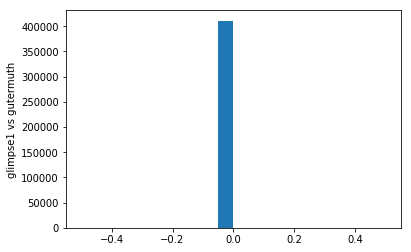

In [64]:
plt.figure(1)
plt.subplot(1,1,1)
plt.hist(D, bins = 20)
plt.ylabel("glimpse1 vs gutermuth")

plt.savefig('/home/kecai/w49/glimpse1_vs_gutermuth')
plt.show()

In [39]:
#con = sql.connect('/home/kecai/w49/w49.db')
#df = pd.read_sql('''SELECT ra, dec FROM glimpse1_mini''', con)
#memcon = sql.connect(':memory')
#df.to_sql('glimpse_mini_position', memcon, if_exists = 'replace',index = True)
#cur = memcon.cursor()
#cur.execute('''select * from glimpse_mini_position''')
#print cur.fetchall()

[(0, 0, 287.597913, 8.788843, 0.3, 0.3, 9.442, 0.038, 9.33, 0.039, 8.96, 0.039, 9.007, 0.027, 0.112, 0.482, 0.435, 0.37, 0.323, -0.047), (1, 1, 287.597944, 8.790369, 0.3, 0.3, 13.345, 0.119, 13.205, 0.159, None, None, None, None, 0.14, None, None, None, None, None), (2, 2, 287.597519, 8.792183999999999, 0.3, 0.3, 8.338, 0.042, 8.358, 0.039, 8.3, 0.037, 8.266, 0.025, -0.02, 0.038, 0.072, 0.058, 0.092, 0.034), (3, 3, 287.60362000000003, 8.784277000000001, 0.3, 0.3, 13.453, 0.079, 13.309, 0.141, None, None, None, None, 0.144, None, None, None, None, None), (4, 4, 287.600759, 8.786649, 0.3, 0.3, 12.125, 0.039, 11.923, 0.076, 11.574, 0.1, 11.452, 0.106, 0.202, 0.551, 0.673, 0.349, 0.471, 0.122)]


In [31]:
#cur1 = con.cursor()
#cur1.execute('''select * from glimpse1_mini''')
#print cur1.fetchall()

[(0, 287.597913, 8.788843, 0.3, 0.3, 9.442, 0.038, 9.33, 0.039, 8.96, 0.039, 9.007, 0.027, 0.112, 0.482, 0.435, 0.37, 0.323, -0.047), (1, 287.597944, 8.790369, 0.3, 0.3, 13.345, 0.119, 13.205, 0.159, None, None, None, None, 0.14, None, None, None, None, None), (2, 287.597519, 8.792183999999999, 0.3, 0.3, 8.338, 0.042, 8.358, 0.039, 8.3, 0.037, 8.266, 0.025, -0.02, 0.038, 0.072, 0.058, 0.092, 0.034), (3, 287.60362000000003, 8.784277000000001, 0.3, 0.3, 13.453, 0.079, 13.309, 0.141, None, None, None, None, 0.144, None, None, None, None, None), (4, 287.600759, 8.786649, 0.3, 0.3, 12.125, 0.039, 11.923, 0.076, 11.574, 0.1, 11.452, 0.106, 0.202, 0.551, 0.673, 0.349, 0.471, 0.122)]


In [50]:
def dummy(db, t1, t1x, t1y):
    #t1 = scrub(table1)
    #t2 = scrub(table2)
    con = sql.connect(db)
    
    df = pd.read_sql('''SELECT '''+t1x+''','''+t1y+''' FROM '''+t1, con)
    df.to_sql('t1', con)
    return df

5